# Codealong 04

## Setup

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
!pip install seaborn
import seaborn as sns

pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

%matplotlib inline
plt.style.use('ggplot')

In [6]:
def read_dataset():
    return pd.read_csv(os.path.join('zillow-04-starter.csv'), index_col = 'ID')

df = read_dataset()
df

,Address,DateOfSale,SalePrice,IsAStudio,BedCount,...,Size,LotSize,BuiltInYear,M1,M2
ID,,,,,,,,,,,
15063471,"55 Vandewater St APT 9, San Francisco, CA",12/4/15,710000.0,0.0,1.0,...,550.0,NaN,1980.0,1.099658,0.097627
15063505,"740 Francisco St, San Francisco, CA",11/30/15,2150000.0,0.0,NaN,...,1430.0,2435.0,1948.0,3.687657,0.430379
15063609,"819 Francisco St, San Francisco, CA",11/12/15,5600000.0,0.0,2.0,...,2040.0,3920.0,1976.0,8.975475,0.205527
15064044,"199 Chestnut St APT 5, San Francisco, CA",12/11/15,1500000.0,0.0,1.0,...,1060.0,NaN,1930.0,2.317325,0.089766
15064257,"111 Chestnut St APT 403, San Francisco, CA",1/15/16,970000.0,0.0,2.0,...,1299.0,NaN,1993.0,1.380945,-0.152690
...,...,...,...,...,...,...,...,...,...,...,...
2124214951,"412 Green St APT A, San Francisco, CA",1/15/16,390000.0,1.0,NaN,...,264.0,NaN,2012.0,0.428094,-0.804647
2126960082,"355 1st St UNIT 1905, San Francisco, CA",11/20/15,860000.0,0.0,1.0,...,691.0,NaN,2004.0,1.302833,0.029844
2128308939,"33 Santa Cruz Ave, San Francisco, CA",12/10/15,830000.0,0.0,3.0,...,1738.0,2299.0,1976.0,1.608882,0.876824


## Part A1 - Simple Linear Regression

### Transforming Variables, e.g., scaling

Activity: How to scale SalePrice from $ to $M, Size and LotSize from sqft to "1,000 sqft"?

In [3]:
def scale_variables(df):
    # Sale price in $M
    df.SalePrice = df.SalePrice / (10 ** 6)
    # Size in 1,000 sqft
    df.Size = df.Size / (10 ** 3)
    # Lot size in 1,000 sqft
    df.LotSize = df.LotSize / (10 ** 3)

scale_variables(df)
df

,Address,DateOfSale,SalePrice,IsAStudio,BedCount,...,Size,LotSize,BuiltInYear,M1,M2
ID,,,,,,,,,,,
15063471,"55 Vandewater St APT 9, San Francisco, CA",12/4/15,0.710,0.0,1.0,...,0.550,NaN,1980.0,1.099658,0.097627
15063505,"740 Francisco St, San Francisco, CA",11/30/15,2.150,0.0,NaN,...,1.430,2.435,1948.0,3.687657,0.430379
15063609,"819 Francisco St, San Francisco, CA",11/12/15,5.600,0.0,2.0,...,2.040,3.920,1976.0,8.975475,0.205527
15064044,"199 Chestnut St APT 5, San Francisco, CA",12/11/15,1.500,0.0,1.0,...,1.060,NaN,1930.0,2.317325,0.089766
15064257,"111 Chestnut St APT 403, San Francisco, CA",1/15/16,0.970,0.0,2.0,...,1.299,NaN,1993.0,1.380945,-0.152690
...,...,...,...,...,...,...,...,...,...,...,...
2124214951,"412 Green St APT A, San Francisco, CA",1/15/16,0.390,1.0,NaN,...,0.264,NaN,2012.0,0.428094,-0.804647
2126960082,"355 1st St UNIT 1905, San Francisco, CA",11/20/15,0.860,0.0,1.0,...,0.691,NaN,2004.0,1.302833,0.029844
2128308939,"33 Santa Cruz Ave, San Francisco, CA",12/10/15,0.830,0.0,3.0,...,1.738,2.299,1976.0,1.608882,0.876824


### `SalePrice` as a function of `Size`

In [5]:
model = smf.ols(formula = 'SalePrice ~ Size',data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     297.4
Date:                Wed, 04 May 2016   Prob (F-statistic):           2.67e-58
Time:                        14:28:45   Log-Likelihood:                -1687.9
No. Observations:                 967   AIC:                             3380.
Df Residuals:                     965   BIC:                             3390.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.1551      0.084      1.842      0.066        -0.010     0.320
Size           0.7497      0.043     17.246      0.000         0.664     0.835
==============================================================================
Omnibus:                     1842.865   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3398350.943
Skew:                          13.502   Prob(JB):                         0.00
Kurtosis:                     292.162   Cond. No.                         4.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model's parameters

In [5]:
model.params

Intercept    0.155052
Size         0.749728
dtype: float64

In [6]:
type(model.params)

pandas.core.series.Series

In [7]:
model.params['Intercept']

0.15505177276001395

### t-values

In [8]:
model.tvalues

Intercept     1.842394
Size         17.245775
dtype: float64

### p-values

In [9]:
model.pvalues

Intercept    6.572416e-02
Size         2.667697e-58
dtype: float64

### Confidence Intervals

In [10]:
model.conf_int(cols = [0, 1])

,0,1
Intercept,-0.010102,0.320205
Size,0.664415,0.835041


In [11]:
type(model.conf_int(cols = [0, 1]))

pandas.core.frame.DataFrame

## Part A2 - Simple Linear Regression

### `SalePrice` as a function of `Size` without `Intercept`

In [12]:
model = smf.ols(formula = 'SalePrice ~ 0 + Size', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     1255.
Date:                Mon, 02 May 2016   Prob (F-statistic):          7.83e-177
Time:                        15:21:03   Log-Likelihood:                -1689.6
No. Observations:                 967   AIC:                             3381.
Df Residuals:                     966   BIC:                             3386.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Size           0.8176      0.023     35.426      0.000         0.772     0.863
==============================================================================
Omnibus:                     1830.896   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3370566.094
Skew:                          13.300   Prob(JB):                         0.00
Kurtosis:                     291.005   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Drop outliers

Activity: How to drop outliers?

In [6]:
def drop_outliers(df):
    print 'Dropping outliers'
    print '- n (before) =', len(df)

    # TODO
    iqr = df['SalePrice'].quantile(0.75) - df['SalePrice'].quantile(0.25)
    df[df['SalePrice'] > df['SalePrice'].quantile(0.25) - 1.5*iqr and df['SalePrice'] < df['SalePrice'].quantile(0.75) + 1.5*iqr]
    print '- n (after)  =', len(df)
    
drop_outliers(df)

Dropping outliers
- n (before) = 1000


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

### `SalePrice` as a function of `Size` (again)

In [14]:
model = smf.ols(formula = 'SalePrice ~ Size', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     297.4
Date:                Mon, 02 May 2016   Prob (F-statistic):           2.67e-58
Time:                        15:21:03   Log-Likelihood:                -1687.9
No. Observations:                 967   AIC:                             3380.
Df Residuals:                     965   BIC:                             3390.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.1551      0.084      1.842      0.066        -0.010     0.320
Size           0.7497      0.043     17.246      0.000         0.664     0.835
==============================================================================
Omnibus:                     1842.865   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3398350.943
Skew:                          13.502   Prob(JB):                         0.00
Kurtosis:                     292.162   Cond. No.                         4.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Part B - How to check modeling assumptions?

### `.plot_regress_exog()`

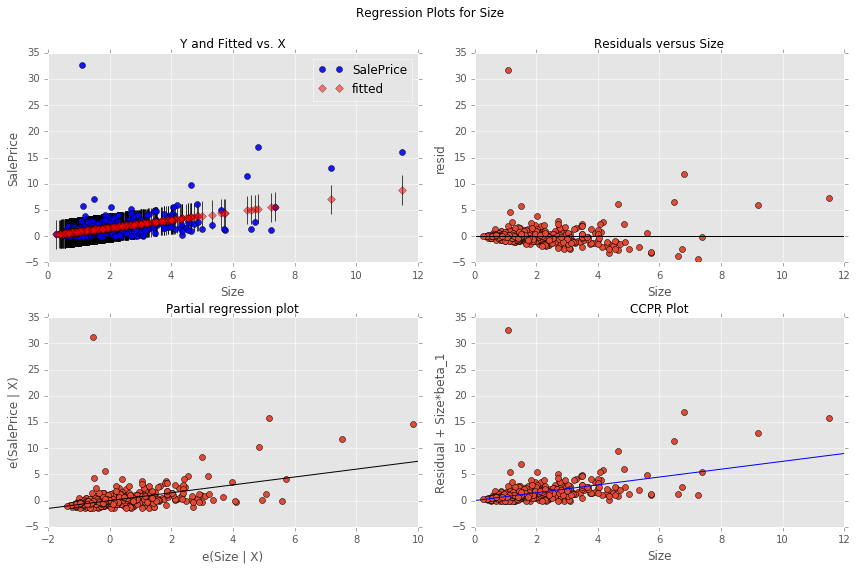

In [15]:
figure = plt.figure(figsize = (12, 8))
figure = sm.graphics.plot_regress_exog(model, 'Size', fig = figure)

## Part C1 - How to check normality assumption?

### Histogram (e.g., residuals)

Activity: How to get histograms of residuals?

In [16]:
model = smf.ols(formula = 'SalePrice ~ Size', data = df).fit()

# TODO

Is it normal?

### q-q plot (e.g., residuals) against a normal distribution

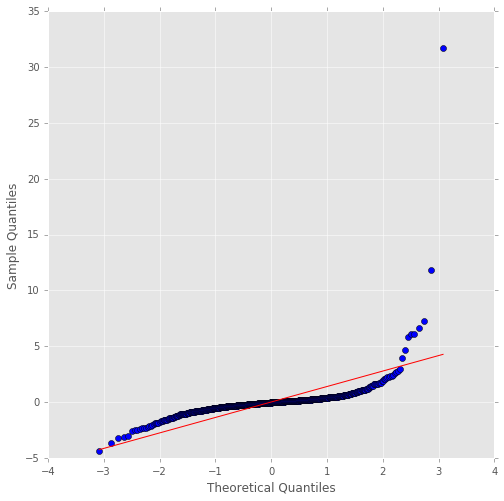

In [17]:
figure, ax = plt.subplots(figsize = (8, 8))
figure = sm.qqplot(model.resid, line = 's', ax = ax)

plt.show()

## Part C2 - How to check normality assumption?

### q-q plot of two normal distributions

`.qqplot()` with `line = 's'`

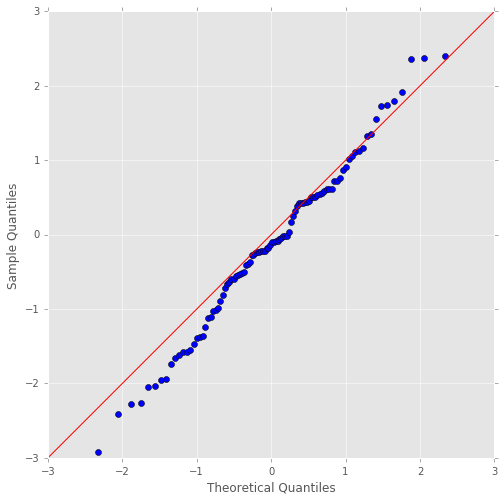

In [18]:
normal_array = np.random.normal(0, 1, size = 100)

figure, ax = plt.subplots(figsize = (8, 8))
figure = sm.qqplot(normal_array, line = '45', ax = ax)
plt.show()

`.qqplot()` with `line = '45'`; N(0, 1) vs. N(0, 1) 

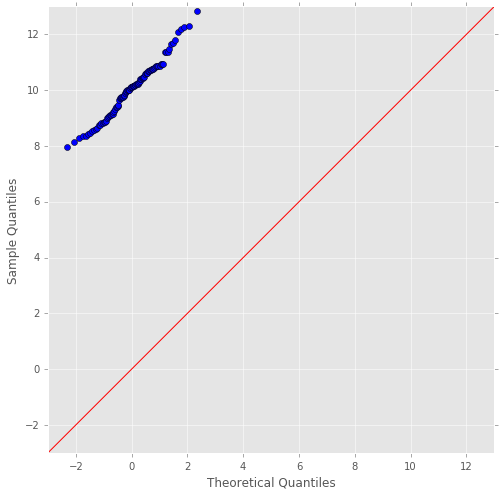

In [19]:
normal_array = np.random.normal(10, 1, size = 100)

figure, ax = plt.subplots(figsize = (8, 8))
figure = sm.qqplot(normal_array, line = '45', ax = ax)
plt.show()

`.qqplot()` with `line = 's'`; N(10, 1) vs. N(0, 1) 

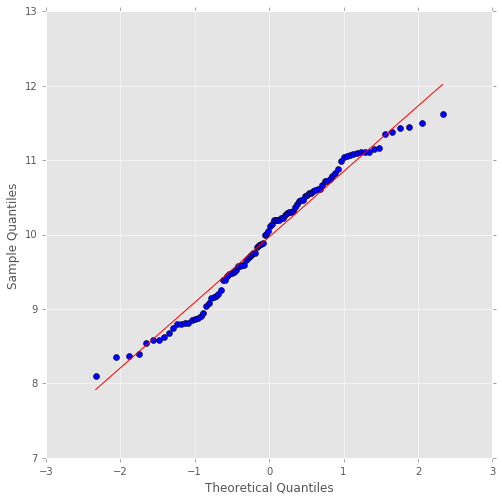

In [20]:
normal_array = np.random.normal(10, 1, size = 100)

figure, ax = plt.subplots(figsize = (8, 8))
figure = sm.qqplot(normal_array, line = 's', ax = ax)
plt.show()

`.qqplot()` with `line = '45'`; N(0, 10) vs. N(0, 1) 

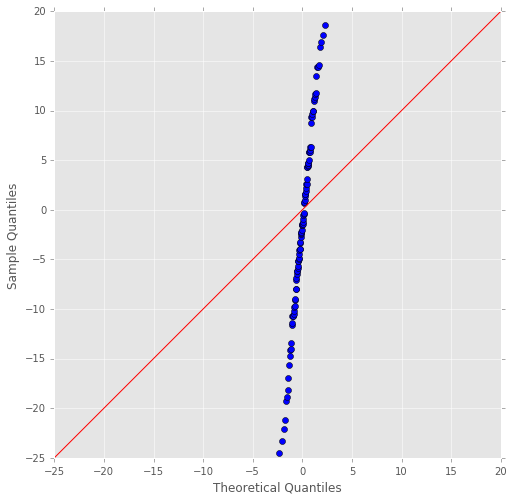

In [21]:
normal_array = np.random.normal(0, 10, size = 100)

figure, ax = plt.subplots(figsize = (8, 8))
figure = sm.qqplot(normal_array, line = '45', ax = ax)
plt.show()

## Part D - Inference and Fit

In [22]:
df = read_dataset() # reload the dataset to get our outliers back...

scale_variables(df) # scaling variables (function defined above)

### Effect of outliers on regression modeling - `SalePrice` as a function of `Size`

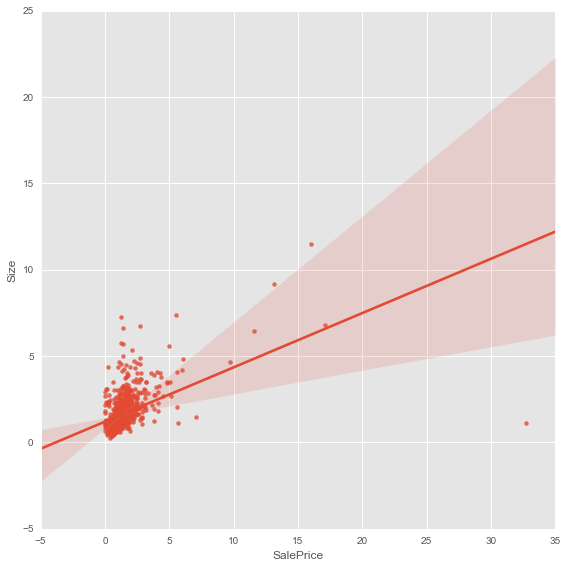

In [14]:
sns.lmplot('SalePrice', 'Size', df, size = 8)

### `SalePrice` as a function of `Size` after dropping the "worst" outlier

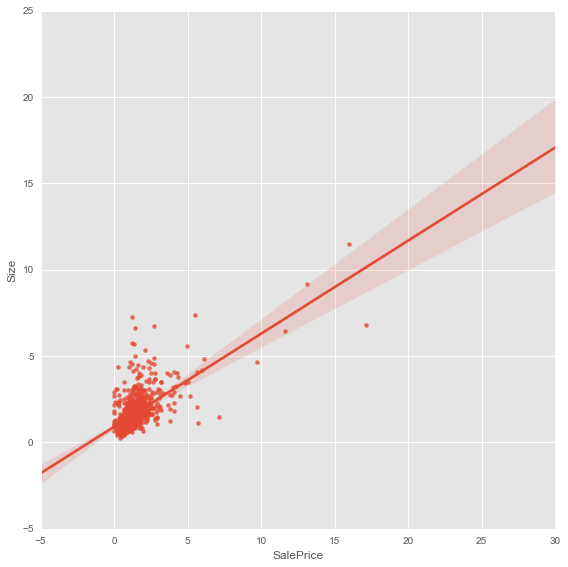

In [15]:
# TODO
subset_df = df[df.SalePrice < df.SalePrice.max()]
sns.lmplot('SalePrice', 'Size', subset_df, size = 8)

## Part E - R<sup>2</sup>

### `SalePrice` as a function of `Size`

In [16]:
model = smf.ols(formula = 'SalePrice ~ 0 + Size', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     1255.
Date:                Wed, 04 May 2016   Prob (F-statistic):          7.83e-177
Time:                        15:17:57   Log-Likelihood:                -1689.6
No. Observations:                 967   AIC:                             3381.
Df Residuals:                     966   BIC:                             3386.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Size           0.8176      0.023     35.426      0.000         0.772     0.863
==============================================================================
Omnibus:                     1830.896   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3370566.094
Skew:                          13.300   Prob(JB):                         0.00
Kurtosis:                     291.005   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### R<sup>2</sup>

In [17]:
model.rsquared

0.56506068149064204

In [ ]:
print 'With outliers:'
print '- SalePrice ~     Size; R^2 =', smf.ols(formula = 'SalePrice ~ Size', data = df).fit().rsquared
print '- SalePrice ~ 0 + Size; R^2 =', smf.ols(formula = 'SalePrice ~ 0 + Size', data = df).fit().rsquared

print
drop_outliers(df) # dropping outliers (function defined above)
print

print 'Without outliers:'
print '- SalePrice ~     Size; R^2 =', smf.ols(formula = 'SalePrice ~ Size', data = df).fit().rsquared
print '- SalePrice ~ 0 + Size; R^2 =', smf.ols(formula = 'SalePrice ~ 0 + Size', data = df).fit().rsquared

## Part F - Multiple Linear Regression

In [3]:
df = read_dataset() # reload the dataset to get our outliers back...

scale_variables(df) # scaling variables (function defined above)

NameError: name 'read_dataset' is not defined

In [4]:
model = smf.ols(formula = 'SalePrice ~ Size + BedCount', data = df).fit()

model.summary()

NameError: name 'df' is not defined

## Part G - Multicollinearity

Yet another way to transform variables: `.apply()`

### Transforming Variables (cont.)

In [ ]:
df[ ['SizeLog', 'LotSizeLog'] ] = df[ ['Size', 'LotSize'] ].apply(np.log10)
df[ ['SizeSqrt', 'LotSizeSqrt'] ] = df[ ['Size', 'LotSize'] ].apply(np.sqrt)
df[ ['SizeSquare', 'LotSizeSquare'] ] = df[ ['Size', 'LotSize'] ].apply(np.square)

In [ ]:
df

### Multicollinearity

Multicollinearity between Size, ln(Size), sqrt(Size), and Size^2

In [ ]:
df[ ['Size', 'SizeLog', 'SizeSqrt', 'SizeSquare' ] ].corr()

In [2]:
model = smf.ols(formula = 'SalePrice ~ Size + SizeLog + SizeSqrt + SizeSquare', data = df).fit()

model.summary()

NameError: name 'df' is not defined

## Part H - Adjusted R<sup>2</sup>

In [7]:
formula = 'SalePrice ~ 0 + IsAStudio + BedCount + BathCount + Size + LotSize'

model = smf.ols(formula = formula, data = df).fit()

print 'R^2 =', model.rsquared, '(original model)'

R^2 = 0.780097143233 (original model)


In [8]:
x_df = pd.DataFrame(index = df.index)

for i in range(100):
    x = 'X{}'.format(i)
    x_df[x] = np.random.random(len(df))

formula = 'SalePrice ~ 0 + IsAStudio + BedCount + BathCount + Size + LotSize + BuiltInYear + '
formula += ' + '.join(x_df.columns.values)

x_df = x_df.join(df)

x_model = smf.ols(formula = formula, data = x_df).fit()

In [17]:
x_model.rsquared_adj

0.77155079855549513

In [12]:
x_model.rsquared()

TypeError: 'numpy.float64' object is not callable